Analyse by age, gender, Systolic and Diastolic

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [218]:
from datetime import datetime as dt

start = dt.now()

In [219]:
df_raw = pd.read_csv("cardio_train_data.csv")

df_raw.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [220]:
# clean up data

# gender:
# 1 = male
# 2 = female

# cholestrol:
# 1 = normal
# 2 = above normal
# 3 = well above normal

# cardio:
# 0 = Non-diseased
# 1 = Diseased

df = df_raw.drop(["id"], axis=1)
df = df.drop(df.loc[:, "height":"weight"], axis=1)
df = df.drop(df.loc[:, "gluc":"active"], axis=1)

df.rename(columns={"ap_hi":"systolic"}, inplace=True)
df.rename(columns={"ap_lo":"diastolic"}, inplace=True)

df["age"] = round(df["age"] / 365)

df.head()

,age,gender,systolic,diastolic,cholesterol,cardio
0,50.0,2,110,80,1,0
1,55.0,1,140,90,3,1
2,52.0,1,130,70,3,1
3,48.0,2,150,100,1,1
4,48.0,1,100,60,1,0


In [221]:
df.tail()

,age,gender,systolic,diastolic,cholesterol,cardio
69995,53.0,2,120,80,1,0
69996,62.0,1,140,90,2,1
69997,52.0,2,180,90,3,1
69998,61.0,1,135,80,1,1
69999,56.0,1,120,80,2,0


In [222]:
df["age"].describe()

count    70000.000000
mean        53.338686
std          6.765294
min         30.000000
25%         48.000000
50%         54.000000
75%         58.000000
max         65.000000
Name: age, dtype: float64

In [223]:
df["cardio"].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [224]:
# recategorise age

# 2015 WHO's age classification
# 25 - 44 : Young : 0
# 45 - 59 : Middle : 1
# 60 - 74 : Elderly : 2
# 75 - 89 : Senile : 3
# 90++ : Long-livers : 4
# https://journals.scholarpublishing.org/index.php/ASSRJ/article/view/2924#:~:text=According%20to%20the%20new%20age,long%2Dlivers%20are%20after%2090.

# data set => min age: 30, max age: 65

# my data classification
# < 45 : "young"
# >= 45 && <60 : "middle"
# >= 60 : "old"

# df.loc[(df["age"] < 45), "age"] = "young"
# df.loc[(df["age"] >= 45) & (df["age"] < 60), "age"] = "middle"
# df.loc[(df["age"] >= 60), "age"] = "old"

# df.tail()

In [225]:
# define x

x = df.iloc[:, 0:5]
x.head()

,age,gender,systolic,diastolic,cholesterol
0,50.0,2,110,80,1
1,55.0,1,140,90,3
2,52.0,1,130,70,3
3,48.0,2,150,100,1
4,48.0,1,100,60,1


In [226]:
# define y

y = df["cardio"]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

In [227]:
# split data into train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [228]:
# instantiate model

from sklearn.tree import DecisionTreeClassifier

decTree = DecisionTreeClassifier(random_state = 42)

In [229]:
# train model

decTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [230]:
# test/predict model

y_pred = decTree.predict(x_test)

In [231]:
# evaluate model

from sklearn.metrics import accuracy_score

accScore = accuracy_score(y_test, y_pred)
print("Accuracy score:",accScore)

Accuracy score: 0.7166285714285714


In [232]:
from sklearn import tree
import graphviz
from graphviz import Source

# Source(tree.export_graphviz(decTree, out_file=None, class_names=True,feature_names=x_train.columns))

In [233]:
# Source(tree.export_graphviz(decTree, out_file=None, class_names=["NonDiseased", "Diseased"],feature_names=x_train.columns))

In [234]:
# set depth to 3

decTree2 = DecisionTreeClassifier(max_depth=3, random_state=42)
decTree2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

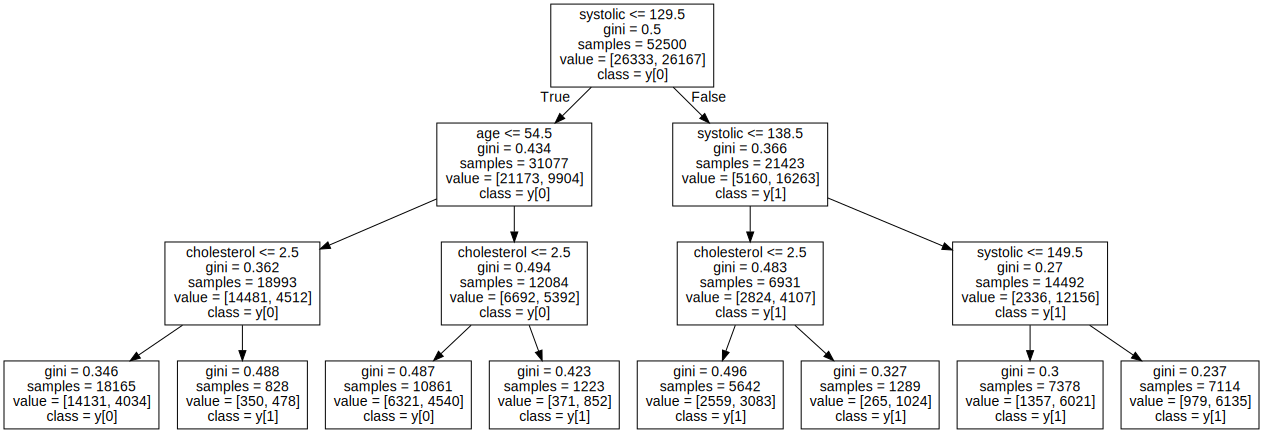

In [235]:
Source(tree.export_graphviz(decTree2, out_file=None, class_names=True,feature_names=x_train.columns))

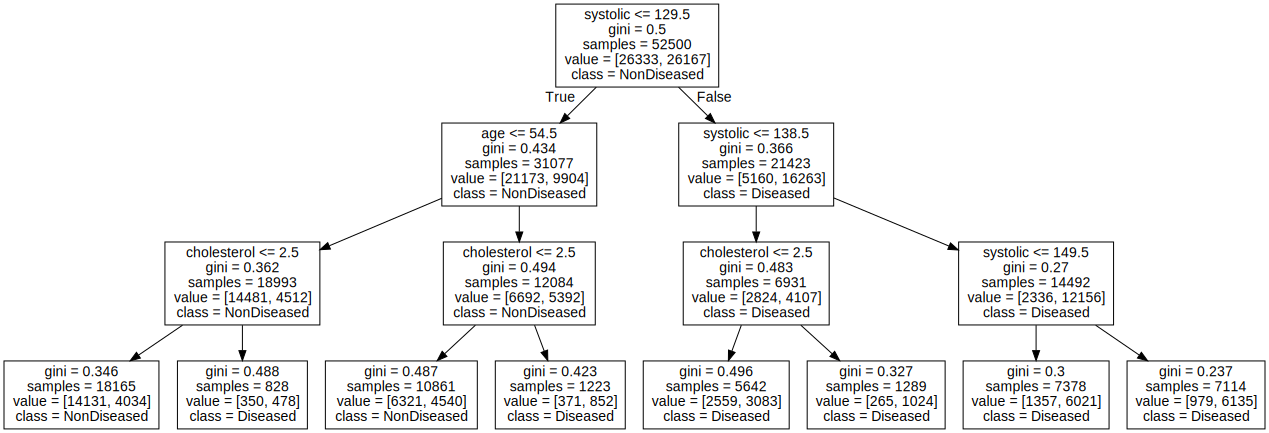

In [236]:
Source(tree.export_graphviz(decTree2, out_file=None, class_names=["NonDiseased", "Diseased"],feature_names=x_train.columns))

In [237]:
y_pred2 = decTree2.predict(x_test)
accuracy_score(y_test, y_pred2)

0.7291428571428571

In [238]:
# set depth to 1

decTree3 = DecisionTreeClassifier(max_depth=1, random_state=42)
decTree3.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

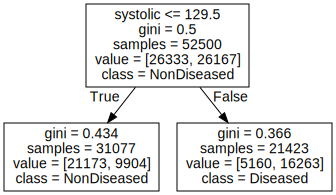

In [239]:
Source(tree.export_graphviz(decTree3, out_file=None, class_names=["NonDiseased", "Diseased"],feature_names=x_train.columns))

In [240]:
y_pred3 = decTree3.predict(x_test)
accuracy_score(y_test, y_pred3)

0.7164

In [241]:
running_secs = (dt.now() - start).seconds

print("Duration of training and prediction:", running_secs, "seconds")

Duration of training and prediction: 1 seconds
